## El mapeo de Hénon




In [1]:
using PyPlot
using TaylorSeries
using IntervalArithmetic, IntervalRootFinding
using ValidatedNumerics
using StaticArrays



In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [3]:

using ParametrizacionMetodo

In [4]:
function Henon(x,y,a,b)
   
    x_n = a-b*y-x^2
    y_n = x 

    return [x_n,y_n]
end

Henon (generic function with 1 method)

Vamos a calcular primero las variedades estables e inestables asociadas al punto fijo (0,0) usando Float64 para un valor del parámetro de K=0.3, para posteriormente compararalas con el cálculo usando presición extendida.

Para poder usar las funciones del método de parametrización es necesario que el mapeo reciba dos parámetros de entrada

In [5]:
function parametro(a)
    x1 = -1.+(1.+a)^.5
    x2 = -1.-(1.+a)^.5
    return [x2,x2]
end
    

parametro (generic function with 1 method)

In [6]:
a=1.5
f_henon(x,y)=Henon(x,y,a,1.)
punto1 = parametro(a)


2-element Array{Float64,1}:
 -2.58114
 -2.58114

In [7]:
a= parse(BigFloat,"1.5")
b=parse(BigFloat,"1.")
h_henon(x,y)=Henon(x,y,a,b)
punto2 = parametro(a)

2-element Array{BigFloat,1}:
 -2.581138830084189665999446772216359266859777569662608413428752426396297219319615
 -2.581138830084189665999446772216359266859777569662608413428752426396297219319615

In [8]:


k=parse(BigFloat,"0.3")
g_henon(x,y)=Henon(x,y,a,k)

g_henon (generic function with 1 method)

Primero calculamos la variedad inestable con un polinomio de orden 20

In [9]:
Orden = 45
x_fijo = [punto1[1],punto1[2]]
tiempo = [0.,3.]
delta_t = 0.125
W_u, f_u, vec_prop, val_prop = Inestable(f_henon,Orden,punto1,tiempo, delta_t)
W_s, f_us, vec_prop_s, val_prop_s = Estable(f_henon, Orden , x_fijo, tiempo, delta_t)

(TaylorSeries.Taylor1{Float64}[ - 2.58113883008419 + 0.9802807895566876 t - 0.04931280661846021 t² + 0.000826889915112779 t³ - 6.750184779658298e-6 t⁴ + 3.160694189440587e-8 t⁵ - 9.47465847482018e-11 t⁶ + 1.9570065931097513e-13 t⁷ - 2.933151342867832e-16 t⁸ + 3.316140944900308e-19 t⁹ - 2.9157701591984315e-22 t¹⁰ + 2.043809885575299e-25 t¹¹ - 1.1655903557368577e-28 t¹² + 5.501209721827138e-32 t¹³ - 2.1798326386909215e-35 t¹⁴ + 7.341538831870081e-39 t¹⁵ - 2.124131763521718e-42 t¹⁶ + 5.329204691628655e-46 t¹⁷ - 1.1690052332483416e-49 t¹⁸ + 2.258606439121923e-53 t¹⁹ - 3.8690439034463816e-57 t²⁰ + 5.911460590184381e-61 t²¹ - 8.099562968601873e-65 t²² + 1.0000955699906925e-68 t²³ - 1.117861392187412e-72 t²⁴ + 1.1357748703735733e-76 t²⁵ - 1.0529369796412226e-80 t²⁶ + 8.937975030431066e-85 t²⁷ - 6.969637037619255e-89 t²⁸ + 5.007512676048765e-93 t²⁹ - 3.3242294060830257e-97 t³⁰ + 2.0443342343038015e-101 t³¹ - 1.1675261054076373e-105 t³² + 6.206271611316304e-110 t³³ - 3.0773734184447084e-114 t³⁴

Las vemos graficadas en el espacio fase

In [10]:
function evaluar(Tiempo, paso,A,B,PuntoFijo,col)
    ValX=Float64[]
    
    ValY=Float64[]
    push!(ValX, PuntoFijo[1]) 
    push!(ValY, PuntoFijo[2])

    for t = Tiempo[1]:paso:Tiempo[2]
        
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",marker =",",color=col)
    title("Espacio Fase(evaluando al final de los intervalos)")
    legend(loc="upper right",fancybox="true")
    xlim(-10.,10.)
    ylim(-10.,10.)
    grid("on")
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

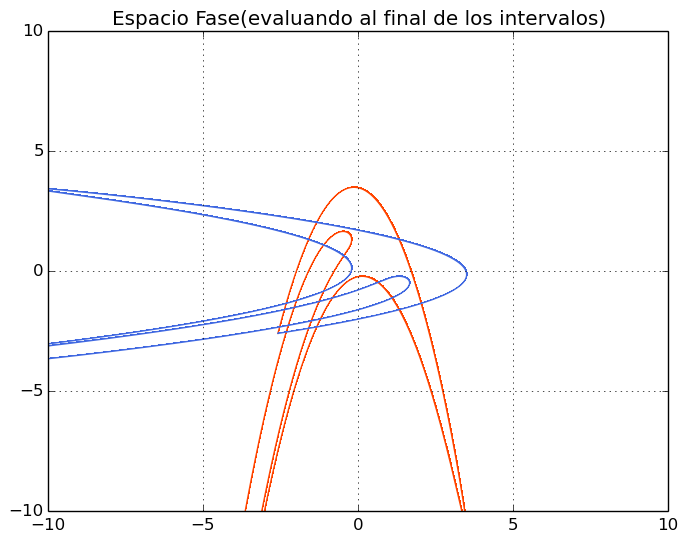

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


([-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  -281.314, -281.418, -281.521, -281.624, -281.727, -281.83, -281.934, -282.037, -282.14, -282.244], [-2.58114, -2.58114, -2.5762, -2.57126, -2.56633, -2.5614, -2.55647, -2.55154, -2.54662, -2.5417  …  -16.9351, -16.9382, -16.9412, -16.9443, -16.9473, -16.9504, -16.9535, -16.9565, -16.9596, -16.9626])

In [11]:

figure(3)
evaluar([0.,1000.], 0.025, W_u[1],W_u[2],x_fijo,"orangered")
evaluar([0.,1000.], 0.025, W_s[1],W_s[2],x_fijo,"royalblue")

In [12]:
tiem = [0.,1000.]
ErrorI_O20 = CalculoError(f_henon, W_u,f_u,tiem,0.025 )
ErrorE_O20 = CalculoError(f_henon, W_s,f_us,tiem,0.025 )


Pol_vec = TaylorSeries.Taylor1{Float64}[ - 2.58113883008419 + 0.19760964962804112 t - 0.0020038953310259713 t² + 6.773617424159547e-6 t³ - 1.114669932051473e-8 t⁴ + 1.0521332829476336e-11 t⁵ - 6.357838642827232e-15 t⁶ + 2.6472556409469542e-18 t⁷ - 7.998263760368897e-22 t⁸ + 1.8228540060439365e-25 t⁹ - 3.2309471137423596e-29 t¹⁰ + 4.565356684414969e-33 t¹¹ - 5.248531646037839e-37 t¹² + 4.993530798463331e-41 t¹³ - 3.988690494681783e-45 t¹⁴ + 2.708020475297876e-49 t¹⁵ - 1.579442983806187e-53 t¹⁶ + 7.988082792624547e-58 t¹⁷ - 3.5322730474657237e-62 t¹⁸ + 1.375738940821406e-66 t¹⁹ - 4.75069098913161e-71 t²⁰ + 1.4632063575821266e-75 t²¹ - 4.041383120007849e-80 t²² + 1.0059296212145887e-84 t²³ - 2.266583414948963e-89 t²⁴ + 4.6423049033593753e-94 t²⁵ - 8.67563836434888e-99 t²⁶ + 1.4845535070457932e-103 t²⁷ - 2.3335898981128854e-108 t²⁸ + 3.379824019349936e-113 t²⁹ - 4.522938409635352e-118 t³⁰ + 5.607112173695211e-123 t³¹ - 6.455228195047083e-128 t³² + 6.917249390055547e-133 t³³ - 6.91417726862

2-element Array{Array{Float64,1},1}:
 [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225  …  999.775, 999.8, 999.825, 999.85, 999.875, 999.9, 999.925, 999.95, 999.975, 1000.0]                                                                          
 [8.88178e-16, 8.89561e-16, 8.90933e-16, 8.92295e-16, 8.93647e-16, 8.94991e-16, 8.96326e-16, 8.97652e-16, 8.98971e-16, 9.00283e-16  …  557.658, 558.252, 558.846, 559.441, 560.036, 560.633, 561.23, 561.827, 562.425, 563.024]

Pol_vec = TaylorSeries.Taylor1{Float64}[ - 2.58113883008419 + 0.9802807895566876 t - 0.04931280661846021 t² + 0.000826889915112779 t³ - 6.750184779658298e-6 t⁴ + 3.160694189440587e-8 t⁵ - 9.47465847482018e-11 t⁶ + 1.9570065931097513e-13 t⁷ - 2.933151342867832e-16 t⁸ + 3.316140944900308e-19 t⁹ - 2.9157701591984315e-22 t¹⁰ + 2.043809885575299e-25 t¹¹ - 1.1655903557368577e-28 t¹² + 5.501209721827138e-32 t¹³ - 2.1798326386909215e-35 t¹⁴ + 7.341538831870081e-39 t¹⁵ - 2.124131763521718e-42 t¹⁶ + 5.329204691628655e-46 t¹⁷ - 1.1690052332483416e-49 t¹⁸ + 2.258606439121923e-53 t¹⁹ - 3.8690439034463816e-57 t²⁰ + 5.911460590184381e-61 t²¹ - 8.099562968601873e-65 t²² + 1.0000955699906925e-68 t²³ - 1.117861392187412e-72 t²⁴ + 1.1357748703735733e-76 t²⁵ - 1.0529369796412226e-80 t²⁶ + 8.937975030431066e-85 t²⁷ - 6.969637037619255e-89 t²⁸ + 5.007512676048765e-93 t²⁹ - 3.3242294060830257e-97 t³⁰ + 2.0443342343038015e-101 t³¹ - 1.1675261054076373e-105 t³² + 6.206271611316304e-110 t³³ - 3.0773734184447084

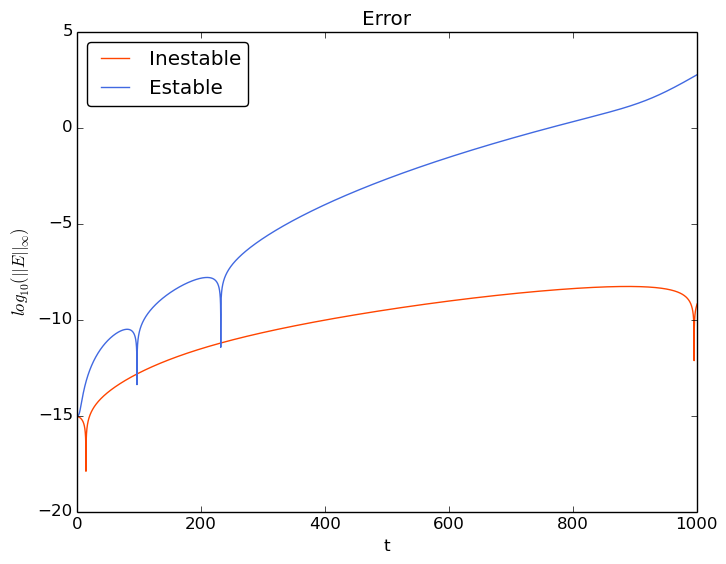

/usr/lib/pymodules/python2.7/matplotlib/legend.py:317: UserWarning: Unrecognized location "low right". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes.iterkeys())))


PyObject <matplotlib.legend.Legend object at 0x7f2a8cad45d0>

In [13]:
plot(ErrorI_O20[1],log10.(ErrorI_O20[2]),marker= "None", label="Inestable",color="orangered")
plot(ErrorE_O20[1],log10.(ErrorE_O20[2]),marker= "None", label="Estable",color="royalblue")

xlabel("t")
ylabel(L"$log_{10}(|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

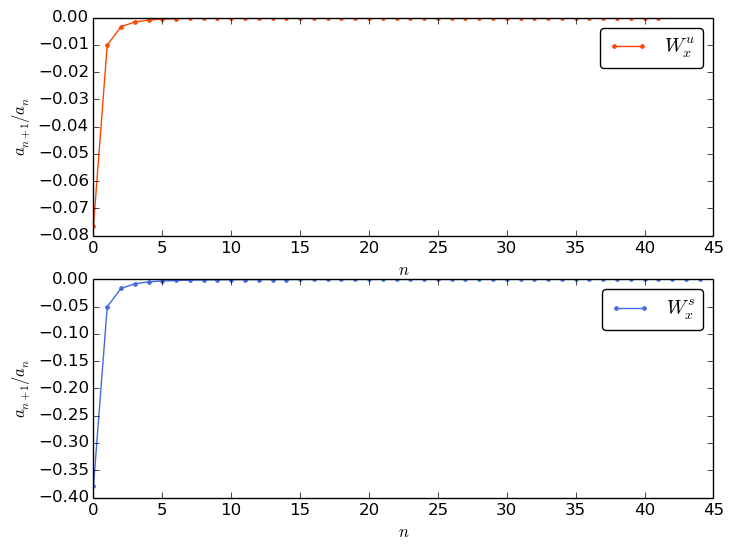

PyObject <matplotlib.legend.Legend object at 0x7f2a8c77c1d0>

In [15]:
ConverU=Convergencia(W_u[1],W_u[2])#Convergencia segun Hadamard
ConverS=Convergencia(W_s[1],W_s[2])
subplot(2,1,1)
plot(ConverU[1],marker=".",label=L"W^{u}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(ConverS[1],marker=".",label=L"W^{s}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"a_{n+1}/a_{n}")
legend(loc="low right",fancybox="true" )

In [14]:
function Interseccion(p)
    (x,y)=p
    V= SVector( W_u[1](x)-W_s[1](y), W_u[2](x)-W_s[2](y) )
    
    #@show(V)
end

Interseccion (generic function with 1 method)

In [15]:
X = (-1.0..100.0)×(0.1..100.) # 2D IntervalBox;

In [16]:
r=roots(Interseccion,X,Newton, 1e-6)

3-element Array{IntervalRootFinding.Root{IntervalArithmetic.IntervalBox{2,Float64}},1}:
 Root([26.1207, 26.1208] × [26.1207, 26.1208], :unique)
 Root([33.6142, 33.6143] × [6.77612, 6.77613], :unique)
 Root([6.77612, 6.77613] × [33.6142, 33.6143], :unique)

In [ ]:
# pygui(true)
evaluar([0.,100.12], 0.025, W_u[1],W_u[2],x_fijo,"orangered")
evaluar([0.,100.12], 0.025, W_s[1],W_s[2],x_fijo,"royalblue")
for ind in eachindex(r)
    plot(W_u[1].([r[ind].interval[1].lo, r[ind].interval[1].hi]), 
         W_u[2].([r[ind].interval[1].lo, r[ind].interval[1].hi]),"o")
end

In [38]:
intervaloX = hull(W_s[1](r[1].interval[1]),W_u[1](r[1].interval[2]))
intervaloY = hull(W_s[2](r[1].interval[1]),W_u[2](r[1].interval[2]))

[1.32898, 1.32899]

In [39]:
intervaloX

[1.32898, 1.32899]

In [61]:
delta1 =r[1].interval[1].lo/1000
delta2 =r[1].interval[2].lo/1000

evaluar([0.,r[1].interval[1].hi+delta1], delta1 , W_u[1],W_u[2],x_fijo,"orangered")
evaluar([0.,r[1].interval[2].hi+delta2], delta2, W_s[1],W_s[2],x_fijo,"royalblue")
plot([intervaloX.lo,intervaloX.hi,intervaloX.hi,intervaloX.lo],
    [intervaloY.lo,intervaloY.lo,intervaloY.hi,intervaloY.hi],"o",linestyle="-",color="green")
#evaluar([0.,r[1].interval[1].lo], 1e-2, W_u[1],W_u[2],x_fijo,"pink")

#evaluar([0.,r[1].interval[2].lo], 1e-2, W_s[1],W_s[2],x_fijo,"green")


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbbc31468d0>

In [56]:
using PyPlot
using PyCall
@pyimport matplotlib.patches as patch

In [65]:
pygui(true)
cfig = figure()
evaluar([0.,r[1].interval[1].hi+delta1], delta1, W_u[1],W_u[2],x_fijo,"orangered")
evaluar([0.,r[1].interval[2].hi+delta2], delta2 , W_s[1],W_s[2],x_fijo,"royalblue")
xx=intervaloX.lo
yy=intervaloY.lo
diam_x = intervaloX.hi-intervaloX.lo
diam_y = intervaloY.hi-intervaloY.lo
plot([intervaloX.lo,intervaloX.hi,intervaloX.hi,intervaloX.lo],
    [intervaloY.lo,intervaloY.lo,intervaloY.hi,intervaloY.hi],"o")
ax = cfig[:add_subplot](1,1,1)
ax[:set_aspect]("equal")
c = patch.Rectangle([xx,yy],diam_x,diam_y,fc="pink",ec="red",linewidth=.5,alpha = 0.5)
ax[:add_artist](c)
cfig[:savefig]("rectangle.png")
grid("on")

In [103]:
W_u[1](r[1].interval[1].lo)

1.3289874527125143

In [76]:
evaluar([0.,26.12], 0.025, W_u[1],W_u[2],x_fijo,"orangered")
evaluar([0.,26.12], 0.025, W_s[1],W_s[2],x_fijo,"royalblue")

([-2.58114, -2.58114, -2.55666, -2.53225, -2.50789, -2.4836, -2.45937, -2.4352, -2.4111, -2.38705  …  1.40658, 1.39873, 1.39087, 1.383, 1.37512, 1.36723, 1.35933, 1.35142, 1.3435, 1.33558], [-2.58114, -2.58114, -2.5762, -2.57126, -2.56633, -2.5614, -2.55647, -2.55154, -2.54662, -2.5417  …  1.30284, 1.30551, 1.30817, 1.31084, 1.3135, 1.31616, 1.31882, 1.32148, 1.32413, 1.32678])

In [14]:
l_henon(x,y)=Henon(x,y,6.5,1)
punto4= parametro(6.5)

2-element Array{Float64,1}:
 -3.73861
 -3.73861

In [8]:
Orden = 55
tiempo = [0.,3.]
delta_t = 0.125
U2, Uf2, vec_propU2, val_propU2 = Inestable(l_henon,Orden, punto4 ,tiempo, delta_t)
S2, Sc2, vec_propS2, val_propS2 = Estable(l_henon, Orden , punto4, tiempo, delta_t)

M = [7.47723 -1.0; 1.0 0.0]
ValsOrden_aux = [7.341, 0.136221]
EigVec_aux = [0.990849 0.134975; 0.134975 0.990849]
EigVec_aux[:, 2] = [0.134975, 0.990849]
"a" = "a"
M = [7.47723 -1.0; 1.0 0.0]
ValsOrden_aux = [7.341, 0.136221]
EigVec_aux = [0.990849 0.134975; 0.134975 0.990849]
EigVec_aux[:, 2] = [0.134975, 0.990849]


(TaylorSeries.Taylor1{Float64}[ - 3.7386127875258306 + 0.9908490602410868 t - 0.021144656610015366 t² + 0.00010795824258162249 t³ - 2.2820411370282007e-7 t⁴ + 2.354401936638939e-10 t⁵ - 1.391198574993085e-13 t⁶ + 5.17929053332535e-17 t⁷ - 1.2911545290882814e-20 t⁸ + 2.2564786583916907e-24 t⁹ - 2.874689942071182e-28 t¹⁰ + 2.758197444524272e-32 t¹¹ - 2.046797142149693e-36 t¹² + 1.200343697390866e-40 t¹³ - 5.662679654054682e-45 t¹⁴ + 2.181272012825054e-49 t¹⁵ - 6.949821403021877e-54 t¹⁶ + 1.8525421224913193e-58 t¹⁷ - 4.173905789705305e-63 t¹⁸ + 8.022798068691299e-68 t¹⁹ - 1.3267070772659432e-72 t²⁰ + 1.901998026307285e-77 t²¹ - 2.3803562035295975e-82 t²² + 2.6169821167811035e-87 t²³ - 2.5419299294326294e-92 t²⁴ + 2.192716124630146e-97 t²⁵ - 1.6877609561122905e-102 t²⁶ + 1.1642049837346543e-107 t²⁷ - 7.22549341295366e-113 t²⁸ + 4.049709638787282e-118 t²⁹ - 2.056761399878514e-123 t³⁰ + 9.495856946723876e-129 t³¹ - 3.997373391321017e-134 t³² + 1.538612497943943e-139 t³³ - 5.429417884134527e-

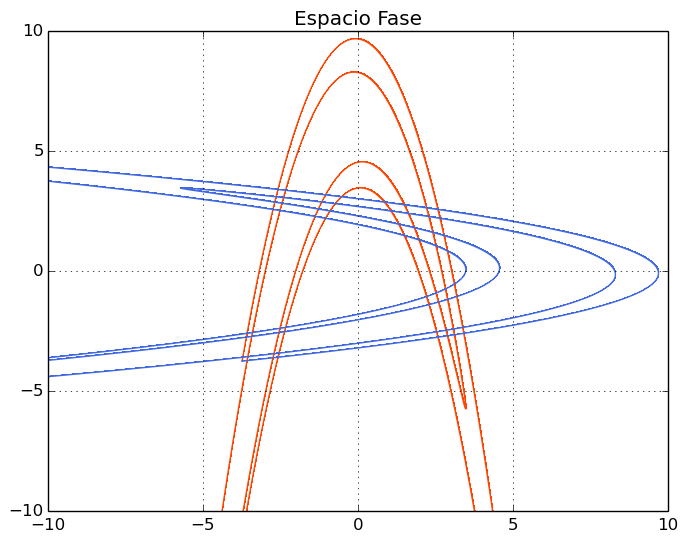

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


In [12]:
evaluar([0.,4486.], 0.025, U2[1],U2[2],punto4,"orangered")
evaluar([0.,4480.], 0.025, S2[1],S2[2],punto4,"royalblue")

In [22]:
tiem = [0.,4480.]
ErrorI_O20 = CalculoError(l_henon, U2,Uf2,tiem,0.025 )
ErrorE_O20 = CalculoError(l_henon, S2,Sc2,tiem,0.025 )

Pol_vec = TaylorSeries.Taylor1{Float64}[ - 3.7386127875258306 + 0.13497458953208685 t - 0.00039236446116720607 t² + 2.728910843490701e-7 t³ - 7.857809998152266e-11 t⁴ + 1.1043409445509177e-14 t⁵ - 8.889067535362357e-19 t⁶ + 4.507978839550954e-23 t⁷ - 1.5308559690123415e-27 t⁸ + 3.644448797005342e-32 t⁹ - 6.32464487068358e-37 t¹⁰ + 8.266373595637316e-42 t¹¹ - 8.356208250049161e-47 t¹² + 6.675483109663871e-52 t¹³ - 4.2898144005758586e-57 t¹⁴ + 2.2508274096664013e-62 t¹⁵ - 9.75082036346697e-68 t¹⁶ + 3.500840261469925e-73 t¹⁷ - 1.0106218422674013e-78 t¹⁸ + 5.971191389615845e-104 t²³ - 4.555657493298221e-109 t²⁴ + 3.4756908365617534e-114 t²⁵ - 2.651741666077998e-119 t²⁶ + 2.023118336546324e-124 t²⁷ + 1.967171299570124e-186 t³⁹ - 4.367997740329086e-202 t⁴² - 2.1535891571495855e-233 t⁴⁸ + 1.6430581338116345e-238 t⁴⁹ + 𝒪(t¹⁵⁶), - 3.7386127875258306 + 0.9908490602410868 t - 0.02114465661001537 t² + 0.00010795824258162255 t³ - 2.282041137028204e-7 t⁴ + 2.3544019366389606e-10 t⁵ - 1.3911985749931

In [23]:
i_henon(x,y)=Henon(x,y,0.3,1.)
punto5 = parametro(0.3)

2-element Array{Float64,1}:
 -2.14018
 -2.14018

In [24]:
Orden = 65
tiempo = [0.,3.]
delta_t = 0.125
U3, Uf3, vec_propU3, val_propU3 = Inestable(i_henon,Orden, punto5 ,tiempo, delta_t)
S3, Sc3, vec_propS3, val_propS3 = Estable(i_henon, Orden , punto5, tiempo, delta_t)

"a" = "a"


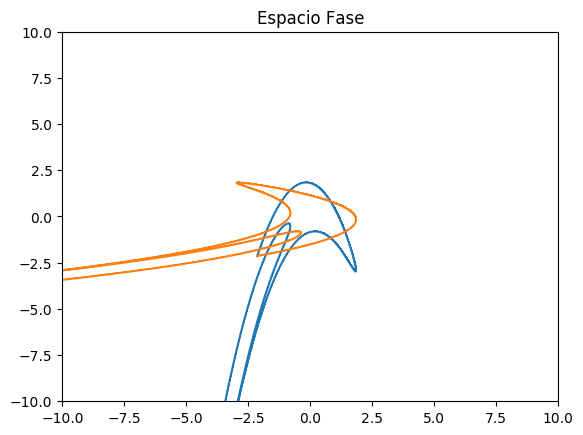

(-10.0,10.0)

In [25]:
evaluar([0.,486.], 0.025, U3[1],U3[2],punto5)
evaluar([0.,480.], 0.025, S3[1],S3[2],punto5)

In [72]:
tiem = [0.,480.]
ErrorI = CalculoError(i_henon, U3,Uf3,tiem,0.025 )
ErrorI2 = CalculoError(i_henon, S3,Sc3,tiem,0.025 )

Pol_vec = TaylorSeries.Taylor1{Float64}[ - 2.1401754250991383 + 0.24070262803383735 t - 0.004811685265797935 t² + 3.778705914277549e-5 t³ - 1.5894638585083133e-7 t⁴ + 4.145329852903211e-10 t⁵ - 7.351164934684917e-13 t⁶ + 9.437428941217376e-16 t⁷ - 9.173858231049498e-19 t⁸ + 6.984342378291085e-22 t⁹ - 4.276217450118477e-25 t¹⁰ + 2.1508413011680756e-28 t¹¹ - 9.044548853953067e-32 t¹² + 3.22676846738083e-35 t¹³ - 9.889110771242865e-39 t¹⁴ + 2.63146192022748e-42 t¹⁵ - 6.1364309283917026e-46 t¹⁶ + 1.264278537647756e-49 t¹⁷ - 2.3179076088401204e-53 t¹⁸ + 3.8058688152304654e-57 t¹⁹ - 5.628724133408302e-61 t²⁰ + 7.537390327988218e-65 t²¹ - 9.181875172753145e-69 t²² + 1.0206307458192358e-72 t²³ - 1.0289918086724466e-76 t²⁴ + 9.851713854477311e-81 t²⁵ - 9.620814311012998e-85 t²⁶ + 5.872079047249144e-89 t²⁷ + 3.0357937145395913e-114 t³⁴ - 3.291414140521664e-133 t³⁹ - 9.809178532724572e-141 t⁴¹ - 1.6227924614682241e-164 t⁴⁷ + 𝒪(t¹⁶⁶), - 2.1401754250991383 + 0.9705989103937858 t - 0.078237532881713

2-element Array{Array{Float64,1},1}:
 [0.0,0.025,0.05,0.075,0.1,0.125,0.15,0.175,0.2,0.225  …  479.775,479.8,479.825,479.85,479.875,479.9,479.925,479.95,479.975,480.0]                                                                     
 [8.88178e-16,8.99142e-16,9.09828e-16,9.20236e-16,9.30367e-16,9.40221e-16,9.49797e-16,9.59096e-16,9.68117e-16,9.76862e-16  …  159.603,159.782,159.961,160.14,160.32,160.5,160.68,160.86,161.04,161.221]

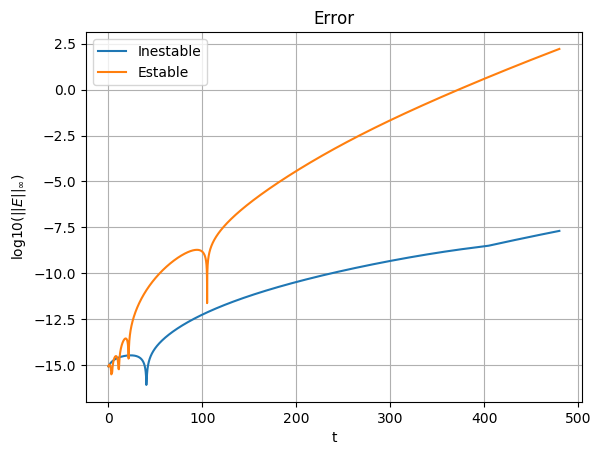

PyObject <matplotlib.legend.Legend object at 0x7f48c9491f50>

In [76]:
plot(ErrorI[1],log10(ErrorI[2]),marker= "None", label="Inestable")
plot(ErrorI2[1],log10(ErrorI2[2]),marker= "None", label="Estable")

xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
grid("on")
legend(loc="low right",fancybox="true" )

Cuidado! esto grafica los errores en función del orden

In [27]:
O1 = 20
O2 = 36
O3 = 45
O4 = 58
O5 = 70
O6 = 89
#O7 = 100
#O8 = 150
#O9 = 163
#O10 = 77
#x_fijo = [big(0.),big(0.)] 
#tiempo = [-big(3.),big(3.)]
tiempo = [0.,500]
delta_t = 0.125
p_fijo = punto1
W1, f1, vec1, val1 = Inestable(f_henon,O1 , p_fijo,tiempo, delta_t)
W2, f2, vec2, val2 = Inestable(f_henon,O2 , p_fijo,tiempo, delta_t)
W3, f3, vec3, val3 = Inestable(f_henon,O3 , p_fijo,tiempo, delta_t)
W4, f4, vec4, val4 = Inestable(f_henon,O4 , p_fijo,tiempo, delta_t)
W5, f5, vec5, val5 = Inestable(f_henon,O5 , p_fijo,tiempo, delta_t)


"a" = "a"
"a" = "a"
"a" = "a"
"a" = "a"
"a" = "a"


(TaylorSeries.Taylor1{Float64}[ - 2.58113883008419 + 0.19760964962804112 t - 0.0020038953310259713 t² + 6.773617424159547e-6 t³ - 1.114669932051473e-8 t⁴ + 1.0521332829476337e-11 t⁵ - 6.357838642827233e-15 t⁶ + 2.647255640946955e-18 t⁷ - 7.9982637603689e-22 t⁸ + 1.8228540060439372e-25 t⁹ - 3.230947113742362e-29 t¹⁰ + 4.565356684414973e-33 t¹¹ - 5.248531646037843e-37 t¹² + 4.993530798463334e-41 t¹³ - 3.9886904946817875e-45 t¹⁴ + 2.7080204752978792e-49 t¹⁵ - 1.5794429838061892e-53 t¹⁶ + 7.98808279262456e-58 t¹⁷ - 3.5322730474657293e-62 t¹⁸ + 1.3757389408214086e-66 t¹⁹ - 4.75069098913162e-71 t²⁰ + 1.4632063575821298e-75 t²¹ - 4.041383120007858e-80 t²² + 1.005929621214591e-84 t²³ - 2.266583414948969e-89 t²⁴ + 4.642304903359388e-94 t²⁵ - 8.675638364348905e-99 t²⁶ + 1.484553507045798e-103 t²⁷ - 2.3335898981128926e-108 t²⁸ + 3.379824019349947e-113 t²⁹ - 4.522938409635367e-118 t³⁰ + 5.6071121736952326e-123 t³¹ - 6.45522819504711e-128 t³² + 6.917249390055577e-133 t³³ - 6.914177268625431e-138 t³

In [41]:
Tiempo = [0.,8500.]
Error1A = CalculoError(f_henon, W1,f1,Tiempo,delta_t)
Error2A = CalculoError(f_henon, W2,f2,Tiempo,delta_t)
Error3A = CalculoError(f_henon, W3,f3,Tiempo,delta_t)
Error4A = CalculoError(f_henon, W4,f4,Tiempo,delta_t)
Error5A = CalculoError(f_henon, W5,f5,Tiempo,delta_t)


Pol_vec = TaylorSeries.Taylor1{Float64}[ - 2.58113883008419 + 0.19760964962804112 t - 0.0020038953310259713 t² + 6.773617424159547e-6 t³ - 1.114669932051473e-8 t⁴ + 1.0521332829476337e-11 t⁵ - 6.357838642827233e-15 t⁶ + 2.647255640946955e-18 t⁷ - 7.9982637603689e-22 t⁸ + 1.8228540060439372e-25 t⁹ - 3.230947113742362e-29 t¹⁰ + 4.565356684414973e-33 t¹¹ - 5.248531646037843e-37 t¹² + 4.993530798463334e-41 t¹³ - 3.9886904946817875e-45 t¹⁴ + 2.7080204752978792e-49 t¹⁵ - 1.5794429838061892e-53 t¹⁶ + 7.98808279262456e-58 t¹⁷ - 3.5322730474657293e-62 t¹⁸ + 1.3757389408214086e-66 t¹⁹ - 4.75069098913162e-71 t²⁰ + 𝒪(t¹²¹), - 2.58113883008419 + 0.9802807895566876 t - 0.04931280661846022 t² + 0.0008268899151127795 t³ - 6.750184779658304e-6 t⁴ + 3.16069418944059e-8 t⁵ - 9.474658474820198e-11 t⁶ + 1.9570065931097554e-13 t⁷ - 2.933151342867839e-16 t⁸ + 3.3161409449003173e-19 t⁹ - 2.915770159198441e-22 t¹⁰ + 2.043809885575307e-25 t¹¹ - 1.1655903557368626e-28 t¹² + 5.501209721827163e-32 t¹³ - 2.17983263

2-element Array{Array{Float64,1},1}:
 [0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,1.125  …  8498.88,8499.0,8499.13,8499.25,8499.38,8499.5,8499.63,8499.75,8499.88,8500.0]                                                                                           
 [8.88178e-16,8.86404e-16,8.84551e-16,8.82619e-16,8.80605e-16,8.78511e-16,8.76334e-16,8.74076e-16,8.71733e-16,8.69307e-16  …  4.16953e6,4.17091e6,4.17229e6,4.17366e6,4.17504e6,4.17641e6,4.17779e6,4.17917e6,4.18055e6,4.18193e6]

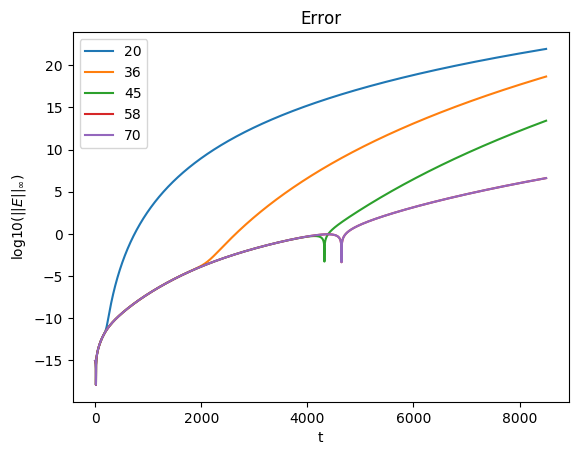

PyObject <matplotlib.legend.Legend object at 0x7f48ca421690>

In [42]:
plot(Error1A[1],log10(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10(Error5A[2]),marker= "None", label="$O5")



xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-13.2)
legend(loc="low right",fancybox="true")

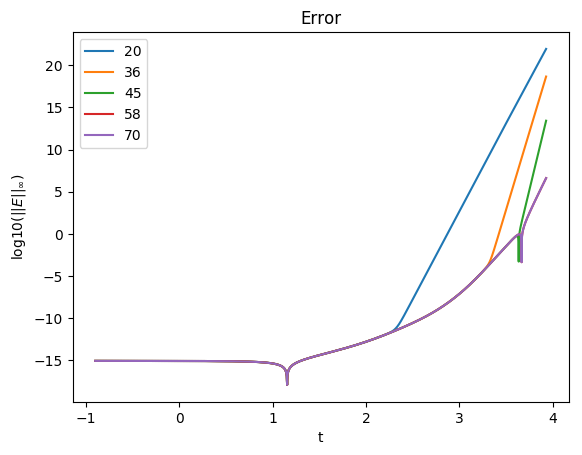

PyObject <matplotlib.legend.Legend object at 0x7f48ca31b450>

In [43]:
plot(log10(Error1A[1]),log10(Error1A[2]),marker= "None", label="$O1")
plot(log10(Error2A[1]),log10(Error2A[2]),marker= "None", label="$O2")
plot(log10(Error3A[1]),log10(Error3A[2]),marker= "None", label="$O3")
plot(log10(Error4A[1]),log10(Error4A[2]),marker= "None", label="$O4")
plot(log10(Error5A[1]),log10(Error5A[2]),marker= "None", label="$O5")



xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-13.2)
legend(loc="low right",fancybox="true")

In [45]:
C1=Convergencia(W1[1],W1[2])
C2=Convergencia(W2[1],W2[2])
C3=Convergencia(W3[1],W3[2])
C4=Convergencia(W4[1],W4[2])
C5=Convergencia(W5[1],W5[2])

(Any[-0.0765591,-0.0101407,-0.00338023,-0.00164561,-0.000943897,-0.000604281,-0.000416377,-0.000302134,-0.000227906,-0.000177247  …  -1.07157e-5,-9.99556e-6,-9.34272e-6,-8.74926e-6,-8.20834e-6,-7.71407e-6,-7.26134e-6,-6.84574e-6,-6.46339e-6,-6.11093e-6],Any[-0.379786,-0.0503048,-0.0167683,-0.00816334,-0.00468238,-0.00299765,-0.00206552,-0.00149879,-0.00113057,-0.000879266  …  -4.34024e-5,-4.07191e-5,-3.82671e-5,-3.60213e-5,-3.39596e-5,-3.20629e-5,-3.03144e-5,-2.86994e-5,-2.7205e-5,-2.58197e-5])

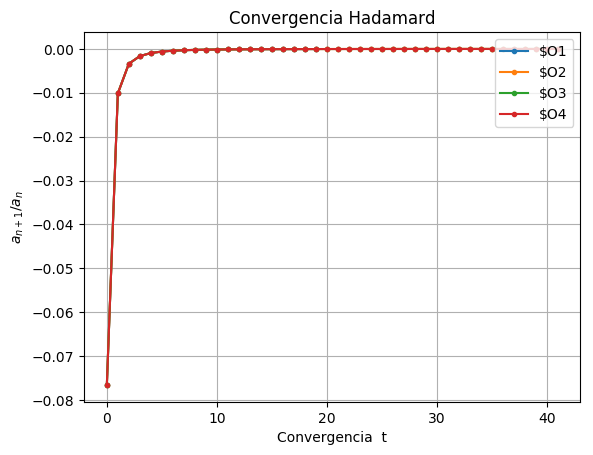

PyObject <matplotlib.legend.Legend object at 0x7f48c9f58750>

In [48]:
plot(C1[1],marker=".",label=L"$O1")
plot(C2[1],marker=".",label=L"$O2")
plot(C3[1],marker=".",label=L"$O3")
plot(C4[1],marker=".",label=L"$O4")
xlabel("Convergencia  t")
ylabel(L"a_{n+1}/a_{n}")
title("t")
grid("on")
title("Convergencia Hadamard")
legend(loc="upper right",fancybox="true" )


In [49]:
c1=Convergencia3(W1[1],W1[2])
c2=Convergencia3(W2[1],W2[2])
c3=Convergencia3(W3[1],W3[2])
c4=Convergencia3(W4[1],W4[2])
c5=Convergencia3(W5[1],W5[2])

(Any[0.0562777,0.0101407,0.00355826,0.00186294,0.0010938,0.000711048,0.000497563,0.000365917,0.00027869,0.000218157  …  1.47832e-5,1.37702e-5,1.28536e-5,1.20219e-5,1.12649e-5,1.05741e-5,9.94222e-6,9.36283e-6,8.83043e-6,8.34019e-6],Any[0.279177,0.0503048,0.0176514,0.00924146,0.005426,0.00352729,0.00246826,0.0018152,0.00138249,0.00108221  …  4.93203e-5,4.64461e-5,4.3805e-5,4.13731e-5,3.91295e-5,3.70556e-5,3.51355e-5,3.33545e-5,3.17001e-5,3.01608e-5])

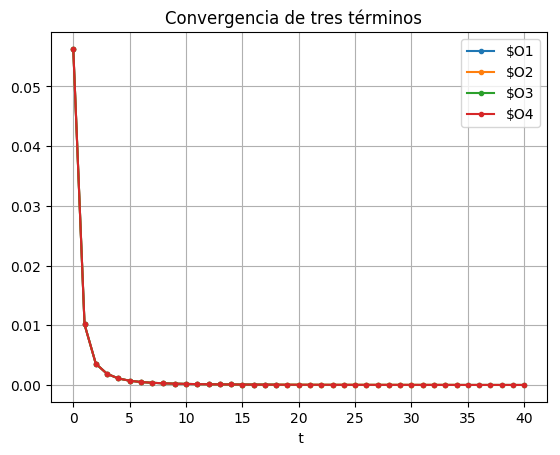

PyObject <matplotlib.legend.Legend object at 0x7f48c9c67d50>

In [53]:
plot(c1[1],marker=".",label=L"$O1")
plot(c2[1],marker=".",label=L"$O2")
plot(c3[1],marker=".",label=L"$O3")
plot(c4[1],marker=".",label=L"$O4")
xlabel(" t")

title("t")
grid("on")
title("Convergencia de tres términos  ")
legend(loc="upper right",fancybox="true")

In [62]:
Orden = 25
tiempo = [0.,3.]
delta_t = 0.125
U4, Uf4, vec_propU4, val_propU4 = Inestable(i_henon,Orden, punto5 ,tiempo, delta_t)
S4, Sc4, vec_propS4, val_propS4 = Estable(i_henon, Orden , punto5, tiempo, delta_t)

"a" = "a"


(TaylorSeries.Taylor1{Float64}[ - 2.1401754250991383 + 0.9705989103937859 t - 0.07823753288171356 t² + 0.0024775361249093166 t³ - 4.2022949083374186e-5 t⁴ + 4.419304547938095e-7 t⁵ - 3.1601665477977226e-9 t⁶ + 1.6359365920403164e-11 t⁷ - 6.412446634883992e-14 t⁸ + 1.9685943194163334e-16 t⁹ - 4.860147566174895e-19 t¹⁰ + 9.857278096958051e-22 t¹¹ - 1.6714543434622808e-24 t¹² + 2.4045531473372728e-27 t¹³ - 2.971548230217963e-30 t¹⁴ + 3.188464720327372e-33 t¹⁵ - 2.998190979791356e-36 t¹⁶ + 2.4908370066600925e-39 t¹⁷ - 1.8414433701758822e-42 t¹⁸ + 1.219200038626835e-45 t¹⁹ - 7.270820166335635e-49 t²⁰ + 3.9257873465798515e-52 t²¹ - 1.9281359376966613e-55 t²² + 8.651001572205156e-59 t²³ - 3.55962684977163e-62 t²⁴ + 1.3480437329110812e-65 t²⁵ + 𝒪(t¹²⁶), - 2.1401754250991383 + 0.24070262803383735 t - 0.0048116852657979405 t² + 3.778705914277557e-5 t³ - 1.589463858508316e-7 t⁴ + 4.145329852903348e-10 t⁵ - 7.351164934684083e-13 t⁶ + 9.437428941215956e-16 t⁷ - 9.17385823104517e-19 t⁸ + 6.984342378

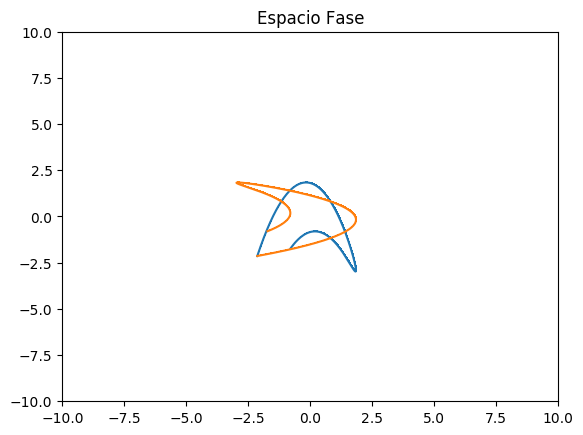

(-10.0,10.0)

In [77]:
evaluar([0.,100.], 0.025, U4[1],U4[2],punto5)
evaluar([0.,100.], 0.025, S4[1],S4[2],punto5)

In [68]:
Tiempo = [0.,100.]
ErrorU4 = CalculoError(i_henon, U4,Uf4,Tiempo,delta_t)
ErrorS4 = CalculoError(i_henon, S4,Sc4,Tiempo,delta_t)

Pol_vec = TaylorSeries.Taylor1{Float64}[ - 2.1401754250991383 + 0.24070262803383735 t - 0.004811685265797935 t² + 3.778705914277549e-5 t³ - 1.5894638585083133e-7 t⁴ + 4.145329852903211e-10 t⁵ - 7.351164934684917e-13 t⁶ + 9.437428941217376e-16 t⁷ - 9.173858231049498e-19 t⁸ + 6.984342378291085e-22 t⁹ - 4.276217450118477e-25 t¹⁰ + 2.1508413011680756e-28 t¹¹ - 9.044548853953067e-32 t¹² + 3.22676846738083e-35 t¹³ - 9.889110771242865e-39 t¹⁴ + 2.63146192022748e-42 t¹⁵ - 6.1364309283917026e-46 t¹⁶ + 1.264278537647756e-49 t¹⁷ - 2.3179076088401204e-53 t¹⁸ + 3.8058688152304654e-57 t¹⁹ - 5.628724133408302e-61 t²⁰ + 7.537390327988218e-65 t²¹ - 9.181875172753145e-69 t²² + 1.0206307458192358e-72 t²³ - 1.0289918086724466e-76 t²⁴ + 9.851713854477311e-81 t²⁵ + 𝒪(t¹²⁶), - 2.1401754250991383 + 0.9705989103937858 t - 0.07823753288171352 t² + 0.002477536124909314 t³ - 4.2022949083374105e-5 t⁴ + 4.4193045479380814e-7 t⁵ - 3.1601665477977052e-9 t⁶ + 1.6359365920403028e-11 t⁷ - 6.41244663488396e-14 t⁸ + 1.968

2-element Array{Array{Float64,1},1}:
 [0.0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0,1.125  …  98.875,99.0,99.125,99.25,99.375,99.5,99.625,99.75,99.875,100.0]                                                                                            
 [8.88178e-16,9.40221e-16,9.8533e-16,1.02352e-15,1.05482e-15,1.07926e-15,1.09689e-15,1.10777e-15,1.11196e-15,1.10953e-15  …  0.17259,0.178327,0.184248,0.190357,0.19666,0.203164,0.209875,0.216798,0.223941,0.231309]

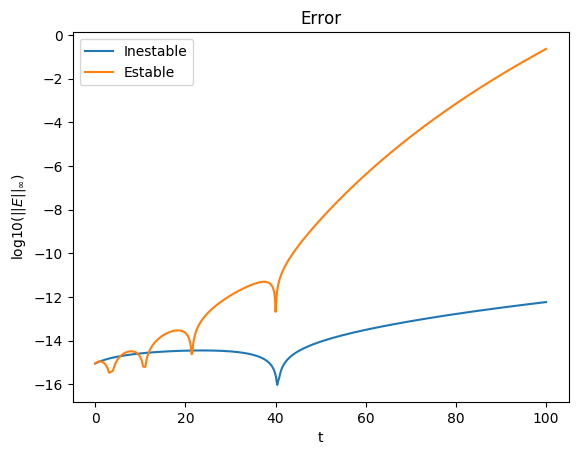

PyObject <matplotlib.legend.Legend object at 0x7f48c98e7890>

In [69]:
plot(ErrorU4[1],log10(ErrorU4[2]),marker= "None", label="Inestable")
plot(ErrorS4[1],log10(ErrorS4[2]),marker= "None", label="Estable")



xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-13.2)
legend(loc="low right",fancybox="true")

In [15]:
Orden = 25
#a= parse(BigFloat,"3.4")
#b=parse(BigFloat,"1.")
#x_fijo = parametro(a) 
c=parse(BigFloat,"180.")
tiempo = [0.,c]
delta_t = parse(BigFloat, "0.125")
W_uB, f_uB, vec_propuB, val_propuB = Inestable(h_henon,Orden , punto2,tiempo, delta_t)
W_sB, f_sB, vec_propsB, val_propsB = Estable(h_henon,Orden , punto2,tiempo, delta_t)

"a" = "a"


(TaylorSeries.Taylor1{BigFloat}[ - 2.581138830084189665999446772216359266859777569662608413428752426396297219319615 + 9.802807895566875914703582460399233162549727757422647425348138442014113837206786e-01 t - 4.931280661846022820398931384416323738083831259564383048110419970339881483245324e-02 t² + 8.268899151127799367035483987298234490248216182740937539837377053353584941457688e-04 t³ - 6.750184779658310235939251934774896122858043451255527850014613320877592014241044e-06 t⁴ + 3.160694189440594924358808017775700152249339252496528237579346546392525458665117e-08 t⁵ - 9.474658474820214243886416890491003641644695564746479282083012473066574672795995e-11 t⁶ + 1.95700659310975994651040037265297662373092883841846768875090775890955483252134e-13 t⁷ - 2.933151342867847022115293554239010809312998175570260851929156689814644491622781e-16 t⁸ + 3.316140944900328766616706748472857299074792664192620544407019996433956371090367e-19 t⁹ - 2.915770159198452536019191695195781182561340706093628380411432292154053151

In [67]:
evaluar([big(0.),big(1180.0)], big(0.025), W_uB[1],W_uB[2],punto2)
evaluar([big(0.),big(1180.0)], big(0.025),  W_sB[1],W_sB[2],punto2)

LoadError: UndefVarError: W_uB not defined

In [17]:
ErrorIB_O20 = CalculoError(h_henon, W_uB,f_uB,[big(0.),big(180.)],big(0.025) )
ErrorEB_O20 = CalculoError(h_henon, W_sB,f_sB,[big(0.),big(180.)],big(0.025 ))

Pol_vec = TaylorSeries.Taylor1{BigFloat}[ - 2.581138830084189665999446772216359266859777569662608413428752426396297219319615 + 1.976096496280411299893517888473283564268459937931934769519718064126592279387433e-01 t - 2.003895331025972196342622826021202503295145606791121461644344458822853575775757e-03 t² + 6.773617424159552153953923390837421197183529244210541087841269515123780312752925e-06 t³ - 1.11466993205147455157327998961640353180987613125678166035321200632683025090382e-08 t⁴ + 1.052133282947635853285857814433379452760584357967862732891384175316328496909155e-11 t⁵ - 6.357838642827248153524793571725232426451796352736420739421144748094079986624664e-15 t⁶ + 2.647255640946963122270053111557294719608588652246241179109925113078753619570912e-18 t⁷ - 7.998263760368929876568370460832463675045213388880502623760589498704957638051457e-22 t⁸ + 1.822854006043945421375534052614212331695279878558791323880740222662535284988522e-25 t⁹ - 3.230947113742378049636580195960056232395326636193016581306484357

2-element Array{Array{BigFloat,1},1}:
 BigFloat[0.000000000000000000000000000000000000000000000000000000000000000000000000000000,2.500000000000000138777878078144567552953958511352539062500000000000000000000000e-02,5.000000000000000277555756156289135105907917022705078125000000000000000000000000e-02,7.500000000000000416333634234433702658861875534057617187500000000000000000000000e-02,1.000000000000000055511151231257827021181583404541015625000000000000000000000000e-01,1.250000000000000069388939039072283776476979255676269531250000000000000000000000e-01,1.500000000000000083266726846886740531772375106811523437500000000000000000000000e-01,1.750000000000000097144514654701197287067770957946777343750000000000000000000000e-01,2.000000000000000111022302462515654042363166809082031250000000000000000000000000e-01,2.250000000000000124900090270330110797658562660217285156250000000000000000000000e-01  …  1.797500000000000099781294338185944070573896169662475585937500000000000000000000e+02,1.797750000000000

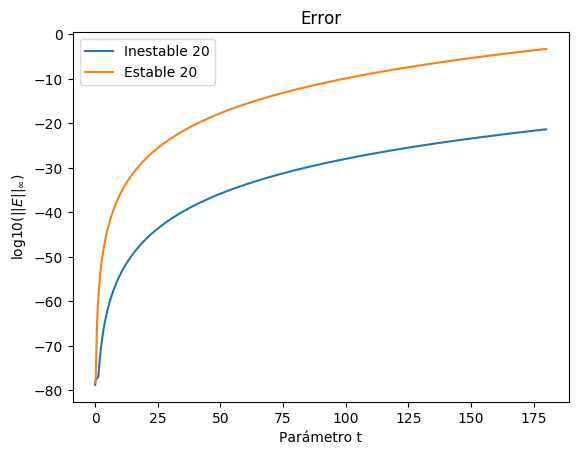

PyObject <matplotlib.legend.Legend object at 0x7fa0dda13b90>

In [18]:
plot(ErrorIB_O20[1],log10(ErrorIB_O20[2]),marker= "None", label="Inestable 20")
plot(ErrorEB_O20[1],log10(ErrorEB_O20[2]),marker= "None", label="Estable 20")

xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
legend(loc="low right",fancybox="true" )

Cuiadao! esto grafica los errores respecto del orden

In [ ]:
O1 = 20
O2 = 10
O3 = 30
O4 = 40
O5 = 25
O6 = 28
x_fijo = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
V1, h1, vec1, val1 = Estable(f_estandar1,O1 , x_fijo,tiempo, delta_t)
V2, h2, vec2, val2 = Estable(f_estandar1,O2 , x_fijo,tiempo, delta_t)
V3, h3, vec3, val3 = Estable(f_estandar1,O3 , x_fijo,tiempo, delta_t)
V4, h4, vec4, val4 = Estable(f_estandar1,O4 , x_fijo,tiempo, delta_t)
V5, h5, vec5, val5 = Estable(f_estandar1,O5 , x_fijo,tiempo, delta_t)
V6, h6, vec6, val6 = Estable(f_estandar1,O6 , x_fijo,tiempo, delta_t)

In [ ]:
Tiempo = [0.,5.]
Error1A = CalculoError(f_estandar1, V1,h1,Tiempo,0.025 )
Error2A = CalculoError(f_estandar1, V2,h2,Tiempo,0.025 )
Error3A = CalculoError(f_estandar1, V3,h3,Tiempo,0.025 )
Error4A = CalculoError(f_estandar1, V4,h4,Tiempo,0.025 )
Error5A = CalculoError(f_estandar1, V5,h5,Tiempo,0.025 )
Error6A = CalculoError(f_estandar1, V6,h6,Tiempo,0.025 )



In [ ]:
plot(Error1A[1],log10(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10(Error6A[2]),marker= "None", label="$O6")


xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-15.2)
legend(loc="low right",fancybox="true" )


## Vamos a graficar las superficies 

In [19]:
function evaluar_g(Tiempo, paso,A,B)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = Tiempo[1]:paso:Tiempo[2]
        
        x = evaluate(A,t)
    
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    return ValX,ValY
    
end

evaluar_g (generic function with 1 method)

In [26]:
Orden = 10
tiempo1 = [0.,3000.]
tiempo2 = [0.,1000]
delta_t = 0.125
figure(1)
for a in 2.:0.2:8.6
    henon_p(x,y)=Henon(x,y,a,1.)
    punto4=parametro(a)
    U2, Uf2, vec_propU2, val_propU2 = Inestable(henon_p,Orden, punto4 ,tiempo1, delta_t)
    #S2, Sc2, vec_propS2, val_propS2 = Estable(henon_p, Orden , punto4, tiempo2, delta_t)
    
    B=evaluar_g(tiempo, delta_t, S2[1],S2[2])
    #V=evaluar_g(tiempo, delta_t, U2[1],U2[2])
    
    pygui(true)
    plot3D(B[2],B[1],a,zdir="z",color="orangered",alpha=0.3)
    #plot3D(V[2],V[1],a,zdir="z",color ="royalblue",alpha=0.3)
    xlim(-2*pi,2*pi)
    ylim(-2*pi,2*pi)
    #zlim(0,8)
    xlabel("X")
    ylabel("Y")
    zlabel("Parámetro")
    #title("Variedades")
    
end

M = [5.4641 -1.0; 1.0 0.0]
ValsOrden_aux = [5.27451, 0.189591]
EigVec_aux = [0.982498 0.186273; 0.186273 0.982498]
EigVec_aux[:, 2] = [0.186273, 0.982498]
"a" = "a"
M = [5.57771 -1.0; 1.0 0.0]
ValsOrden_aux = [5.39226, 0.185451]
EigVec_aux = [0.983235 0.182342; 0.182342 0.983235]
EigVec_aux[:, 2] = [0.182342, 0.983235]
"a" = "a"
M = [5.68782 -1.0; 1.0 0.0]
ValsOrden_aux = [5.5062, 0.181613]
EigVec_aux = [0.983905 0.17869; 0.17869 0.983905]
EigVec_aux[:, 2] = [0.17869, 0.983905]
"a" = "a"
M = [5.79473 -1.0; 1.0 0.0]
ValsOrden_aux = [5.61669, 0.178041]
EigVec_aux = [0.984518 0.175284; 0.175284 0.984518]
EigVec_aux[:, 2] = [0.175284, 0.984518]
"a" = "a"
M = [5.89872 -1.0; 1.0 0.0]
ValsOrden_aux = [5.72402, 0.174703]
EigVec_aux = [0.98508 0.172096; 0.172096 0.98508]
EigVec_aux[:, 2] = [0.172096, 0.98508]
"a" = "a"
M = [6.0 -1.0; 1.0 0.0]
ValsOrden_aux = [5.82843, 0.171573]
EigVec_aux = [0.985599 0.169102; 0.169102 0.985599]
EigVec_aux[:, 2] = [0.169102, 0.985599]
"a" = "a"
M = [6.09878 -1.